# Project Walk Through - Feature Selection

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data: Graduate Admissions

In [2]:
df = pd.read_csv("grad_admit_.csv")

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,3.89,1,1
1,324,107,4,4.0,4.5,3.58,1,1
2,316,104,3,3.0,3.5,3.23,1,0
3,322,110,3,3.5,2.5,3.50,1,1
4,314,103,2,2.0,3.0,3.31,0,0


---

## Create a scatter plot of "GRE Score" and "TOEFL Score" to see if they are closely related.

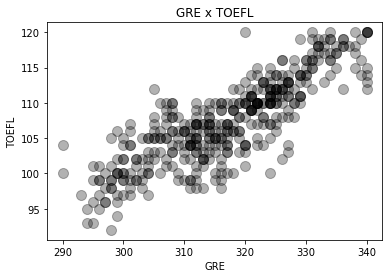

In [3]:
fig, ax = plt.subplots()

ax.scatter(x=df['GRE Score'], y=df['TOEFL Score'], alpha=.3, s = 100, c = "black")
 
# Set the properties
ax.set(title="GRE x TOEFL", xlabel='GRE', ylabel="TOEFL");

---

## Combine "GRE Score" and "TOEFL Score" into a new feature named "Performance Score.

In [4]:
df["Performance Score"] = df["GRE Score"] + df["TOEFL Score"]

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted,Performance Score
0,337,118,4,4.5,4.5,3.89,1,1,455
1,324,107,4,4.0,4.5,3.58,1,1,431
2,316,104,3,3.0,3.5,3.23,1,0,420
3,322,110,3,3.5,2.5,3.50,1,1,432
4,314,103,2,2.0,3.0,3.31,0,0,417


---

## Pair Plot
### Note any features that are highly correlated with "Performance Score" to see if there are features that we can drop.

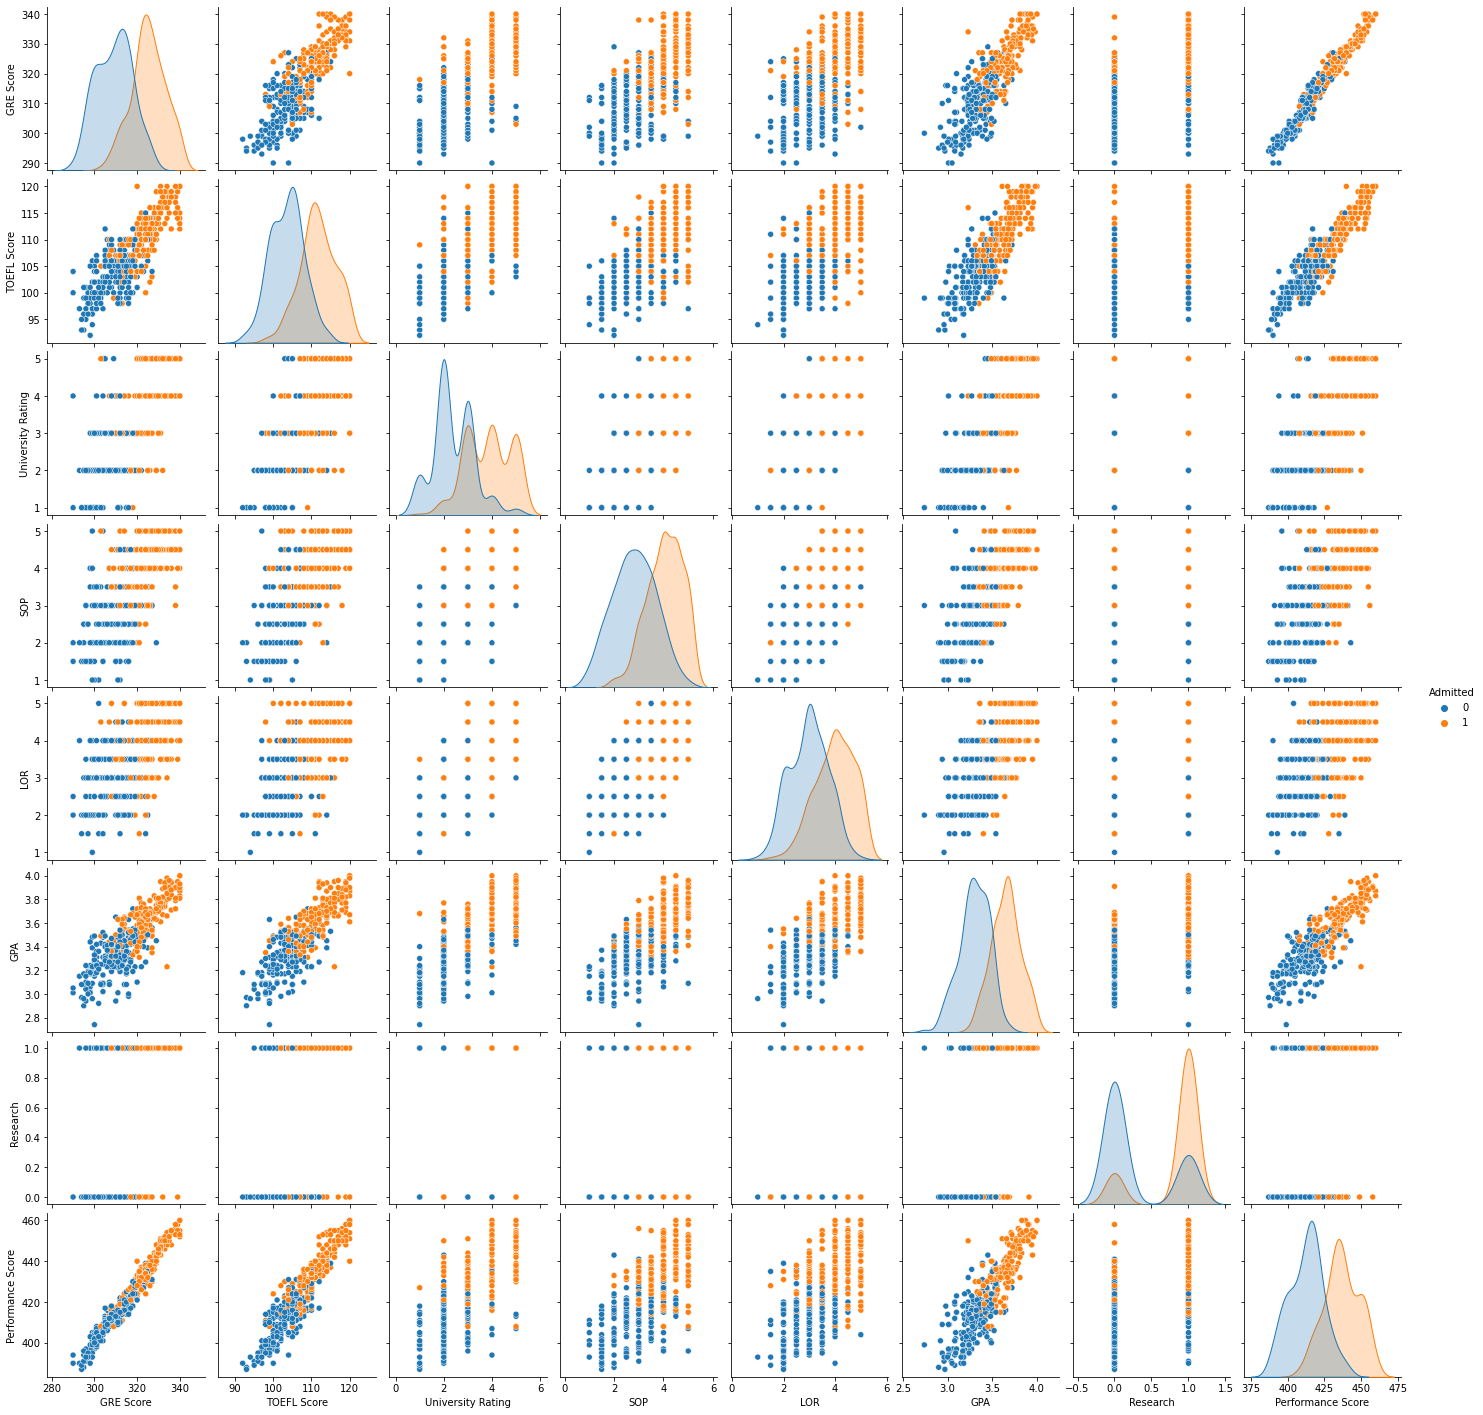

In [5]:
sns.pairplot(data=df, hue="Admitted");

---

## Create box plots of "SOP" and "LOR". 

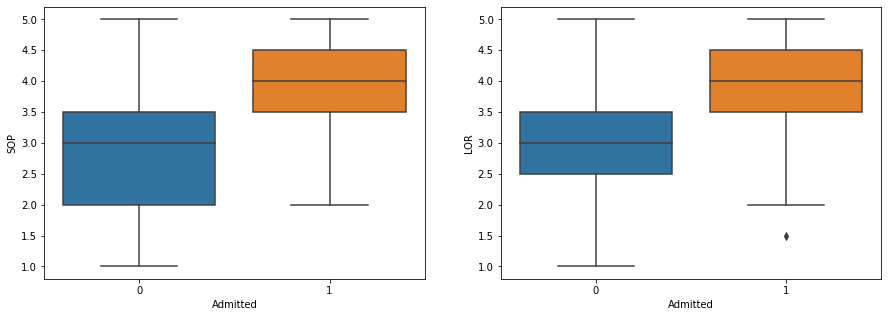

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.boxplot(x=df["Admitted"], y=df["SOP"], ax=ax[0])
sns.boxplot(x=df["Admitted"], y=df["LOR"], ax=ax[1]);

---

## Drop low-contributing features

In [7]:
df = df.drop(["GRE Score", "TOEFL Score", "SOP"], axis=1)

df.head()

,University Rating,LOR,GPA,Research,Admitted,Performance Score
0,4,4.5,3.89,1,1,455
1,4,4.5,3.58,1,1,431
2,3,3.5,3.23,1,0,420
3,3,2.5,3.50,1,1,432
4,2,3.0,3.31,0,0,417


### Reorder the features so that "Admitted" is the last feature.

In [8]:
df = df.iloc[:, [0,1,2,3,5,4]]

df.head()

,University Rating,LOR,GPA,Research,Performance Score,Admitted
0,4,4.5,3.89,1,455,1
1,4,4.5,3.58,1,431,1
2,3,3.5,3.23,1,420,0
3,3,2.5,3.50,1,432,1
4,2,3.0,3.31,0,417,0


### Separate the values into X (features) and y (target).

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
X[:5]

array([[  4.  ,   4.5 ,   3.89,   1.  , 455.  ],
       [  4.  ,   4.5 ,   3.58,   1.  , 431.  ],
       [  3.  ,   3.5 ,   3.23,   1.  , 420.  ],
       [  3.  ,   2.5 ,   3.5 ,   1.  , 432.  ],
       [  2.  ,   3.  ,   3.31,   0.  , 417.  ]])

In [11]:
y[:5]

array([1, 1, 0, 1, 0])

---

# Machine Learning

### Split the data into separate train and test sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

### Standardize the data

In [13]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

---

## Machine Learning Algorhithms

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
log_reg.score(X_test_std, y_test)

0.9083333333333333

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
rf.score(X_test_std, y_test)

0.9

### K-nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.8833333333333333